### Not the same but closely followed the guide of Niklas Donges's [Medium Article](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#### Feature Details
- survival:    Survival 
- PassengerId: Unique Id of a passenger. 
- pclass:    Ticket class     
- sex:    Sex     
- Age:    Age in years     
- sibsp:    # of siblings / spouses aboard the Titanic     
- parch:    # of parents / children aboard the Titanic     
- ticket:    Ticket number     
- fare:    Passenger fare     
- cabin:    Cabin number     
- embarked:    Port of Embarkation

In [2]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

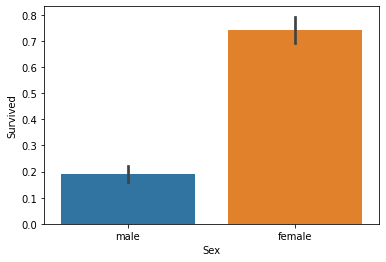

In [5]:
sns.barplot(x='Sex', y='Survived', data=train_data)

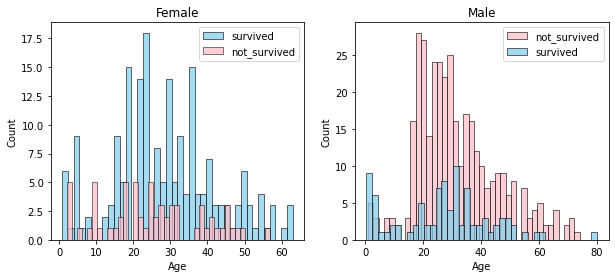

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = train_data[train_data['Sex']=='female']
male = train_data[train_data['Sex']=='male']
ax0 = sns.histplot(female[female['Survived']==1].Age.dropna(), bins=40, label = 'survived', ax = axes[0], kde =False, color='skyblue')
ax0 = sns.histplot(female[female['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[0], kde =False, color='pink')
ax0.legend()
ax0.set_title('Female')

ax1 = sns.histplot(male[male['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False, color='pink')
ax1 = sns.histplot(male[male['Survived']==1].Age.dropna(), bins=40, label = 'survived', ax = axes[1], kde = False, color='skyblue')
ax1.legend()
_ = ax1.set_title('Male')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

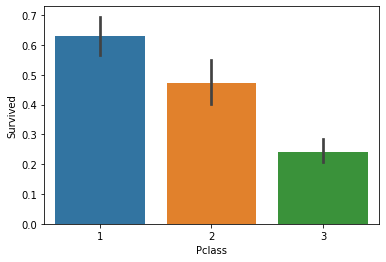

In [7]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

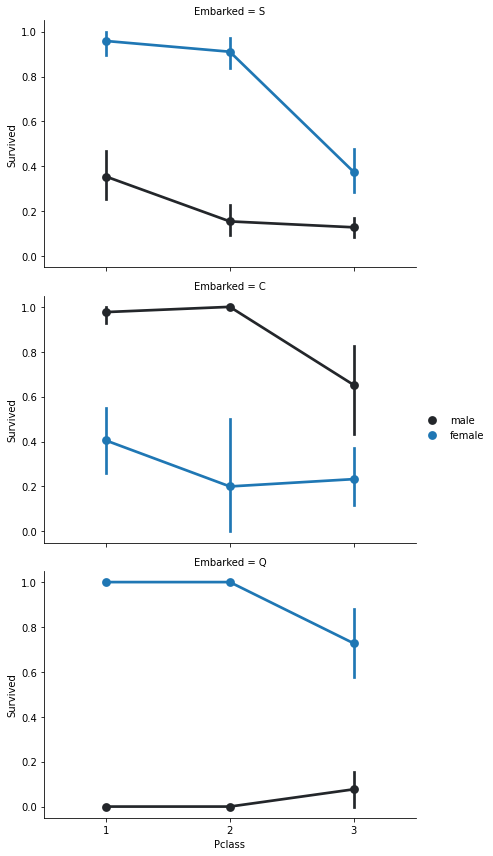

In [8]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', height=4, aspect=1.5)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None)
FacetGrid.add_legend()

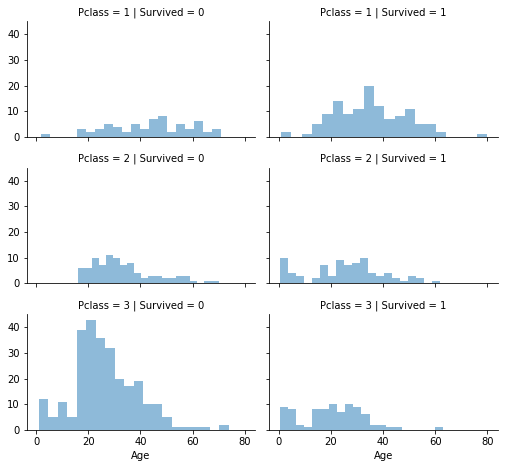

In [9]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### Data Preprocessing

In [10]:
train_data.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

#### Imputing missing data (for "Age" and "Embarked")

In [11]:
# Simply impute "Age" with Normal(mean, std^2)
# It can be done better if we impute age using other features (for example, decision-tree)

datasets = [train_data, test_data]

for dataset in datasets:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    nNull = dataset["Age"].isnull().sum()
    impute_age = std * np.random.randn(nNull) + mean
    
    age_copy = dataset["Age"].copy()
    age_copy[np.isnan(age_copy)] = impute_age
    dataset["Age"] = age_copy
    dataset["Age"] = dataset["Age"].astype(int)
    
if train_data["Age"].isnull().sum() == 0:
    print("'Age's are all imputed for training data!")
else:
    print("'Age' is not perfectly imputed for training data!")
if test_data["Age"].isnull().sum() == 0:
    print("'Age's are all imputed for test data!")
else:
    print("'Age' is not perfectly imputed for test data!")

'Age's are all imputed for training data!
'Age's are all imputed for test data!


In [12]:
# Impute "Embarked" with the most common value
# This can also be better imputed using other features

train_data["Embarked"].describe(), test_data["Embarked"].describe()

(count     889
 unique      3
 top         S
 freq      644
 Name: Embarked, dtype: object,
 count     418
 unique      3
 top         S
 freq      270
 Name: Embarked, dtype: object)

In [13]:
most_common = 'S' # or train_data["Embarked"].mode().item()
for dataset in datasets:
    dataset["Embarked"].fillna(value=most_common, inplace=True)

print('Missing values :', train_data["Embarked"].isnull().sum(), test_data["Embarked"].isnull().sum())

Missing values : 0 0


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


#### Introducing Dummy Variables for Categorical Variables (~ One Hot Encoding) 

In [15]:
# Sex: Male->0, Female->1
gender = {"male":0, "female":1}
for dataset in datasets:
    dataset["Sex"] = dataset["Sex"].map(gender)

In [16]:
# Embarked: S->(0, 0), C->(1, 0), Q->(0,1)
for dataset in datasets:
    dataset["Embarked_C"] = (dataset["Embarked"] == 'C').map(int)
    dataset["Embarked_Q"] = (dataset["Embarked"] == 'Q').map(int)
    dataset.drop('Embarked', axis=1, inplace=True)

In [17]:
# Pclass: 3->(0, 0), 2->(1,0), 1->(0, 1)
for dataset in datasets:
    dataset["class1"] = (dataset["Pclass"] == 1).map(int)
    dataset["class2"] = (dataset["Pclass"] == 2).map(int)
    dataset.drop("Pclass", axis=1, inplace=True)

In [18]:
# Age: Split into groups (8 groups)
for dataset in datasets:
    dataset["Age18"] = ((dataset["Age"] > 11) & (dataset["Age"] <= 18)).map(int)
    dataset["Age22"] = ((dataset["Age"] > 18) & (dataset["Age"] <= 22)).map(int)
    dataset["Age27"] = ((dataset["Age"] > 22) & (dataset["Age"] <= 27)).map(int)
    dataset["Age33"] = ((dataset["Age"] > 27) & (dataset["Age"] <= 33)).map(int)
    dataset["Age40"] = ((dataset["Age"] > 33) & (dataset["Age"] <= 40)).map(int)
    dataset["Age57"] = ((dataset["Age"] > 40) & (dataset["Age"] <= 57)).map(int)
    dataset["Age100"] = (dataset["Age"] > 57).map(int)
    dataset.drop("Age", axis=1, inplace=True)

# let's see how it's distributed train_df['Age'].value_counts()
_11to18 = train_data["Age18"].sum()
_18to22 = train_data["Age22"].sum()
_22to27 = train_data["Age27"].sum()
_27to33 = train_data["Age33"].sum()
_33to40 = train_data["Age40"].sum()
_40to57 = train_data["Age57"].sum()
_57to100 = train_data["Age100"].sum()
_to11 = train_data.shape[0] - _11to18 - _18to22 - _22to27 - _27to33 - _33to40 - _40to57 - _57to100

print(f'~11: \t {_to11}')
print(f'11~18: \t {_11to18}')
print(f'18~22: \t {_18to22}')
print(f'22~27: \t {_22to27}')
print(f'27~33: \t {_27to33}')
print(f'33~40: \t {_33to40}')
print(f'40~57: \t {_40to57}')
print(f'57~100:\t {_57to100}')

~11: 	 86
11~18: 	 92
18~22: 	 110
22~27: 	 127
27~33: 	 151
33~40: 	 134
40~57: 	 153
57~100:	 38


In [19]:
# SibSp / Parch (Sibling, Spouse, Parent, Child)
# relatives = SibSp + Parch
# Family_None: relatives == 0 / Family_Little: relatives == 1~3 / Family_Many: relatives >= 4
for dataset in datasets:
    dataset["relatives"] = dataset["SibSp"] + dataset["Parch"]
    dataset["Family_None"] = (dataset["relatives"] == 0).map(int)
    dataset["Family_Little"] = dataset["relatives"].map(lambda x: 1 if x>=1 and x<=3 else 0)
    dataset["Family_Many"] = dataset["relatives"].map(lambda x: 1 if x>=4 else 0)
    dataset.drop(["relatives", "SibSp", "Parch"], axis=1, inplace=True)

In [20]:
# Fare - Normalization
from sklearn import preprocessing

# Get mean and std of "Fare" in training data 
scaler = preprocessing.StandardScaler().fit(train_data["Fare"].values.reshape(-1,1))
train_data["Fare"] = scaler.transform(train_data["Fare"].values.reshape(-1, 1))
# For test set
test_data["Fare"] = scaler.transform(test_data["Fare"].values.reshape(-1, 1))

In [21]:
# Age x Pclass interaction (7x2)

age_groups = ["Age18", "Age22", "Age27", "Age33", "Age40", "Age57", "Age100"]
pclass_groups = ["class1", "class2"]

for dataset in datasets:
    for Age_Group in age_groups:
        for Pclass_Group in pclass_groups:
            dataset[Age_Group+"*"+Pclass_Group] = dataset[Age_Group].multiply(dataset[Pclass_Group])

In [22]:
train_data.head()

,Survived,Sex,Fare,Embarked_C,Embarked_Q,class1,class2,Age18,Age22,Age27,...,Age27*class1,Age27*class2,Age33*class1,Age33*class2,Age40*class1,Age40*class2,Age57*class1,Age57*class2,Age100*class1,Age100*class2
0,0,0,-0.502445,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.786845,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,-0.488854,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0.420730,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,-0.486337,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Logistic Regression (with Ridge Regression as well)
from sklearn.linear_model import LogisticRegression

Y_train = train_data.pop("Survived")
X_train = train_data
X_test = test_data
X_test["Fare"].fillna(value=0, inplace=True)

logis_reg = LogisticRegression(penalty='none', C=1, max_iter=5000)
logis_reg.fit(X_train, Y_train)

unreg_predict = logis_reg.predict(X_test)

logis_reg_l2 = LogisticRegression(penalty='l2', C=1, max_iter=5000)
logis_reg_l2.fit(X_train, Y_train)

reg_predict = logis_reg_l2.predict(X_test)

logis_reg_l2_C = LogisticRegression(penalty='l2', C=0.5, max_iter=5000)
logis_reg_l2_C.fit(X_train, Y_train)

reg_C_predict = logis_reg_l2_C.predict(X_test)

In [24]:
''' 
Printing the prediction results as csv files

submission_format = pd.read_csv('gender_submission.csv')
submission_format["Survived"] = unreg_predict
submission_format.to_csv('unregularized_prediction.csv', index=False)

reg_submission_format = pd.read_csv('gender_submission.csv')
reg_submission_format["Survived"] = reg_predict
reg_submission_format.to_csv('regularized_prediction.csv', index=False)

reg_submission_format = pd.read_csv('gender_submission.csv')
reg_submission_format["Survived"] = reg_C_predict
reg_submission_format.to_csv('C_regularized_prediction.csv', index=False)
'''

' \nPrinting the prediction results as csv files\n\nsubmission_format = pd.read_csv(\'gender_submission.csv\')\nsubmission_format["Survived"] = unreg_predict\nsubmission_format.to_csv(\'unregularized_prediction.csv\', index=False)\n\nreg_submission_format = pd.read_csv(\'gender_submission.csv\')\nreg_submission_format["Survived"] = reg_predict\nreg_submission_format.to_csv(\'regularized_prediction.csv\', index=False)\n\nreg_submission_format = pd.read_csv(\'gender_submission.csv\')\nreg_submission_format["Survived"] = reg_C_predict\nreg_submission_format.to_csv(\'C_regularized_prediction.csv\', index=False)\n'